# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DatetimeIndex

In [191]:
path=("C:/Users/MSI/Desktop/Entrega_python_pandas_Nestor/")
df=pd.read_csv(path+"sample_NYC_parking_issues.csv",sep=";")
df.head
df.shape

(10000, 44)

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [4]:
print(df.isnull().sum()) # para saber cuantos NAN hay por columan en el DF. Al haber tantas columans no permite visualizar bien

df.isnull().sum().sum() # Se suman todos los NAN que hay en el DF


Unnamed: 0                               0
Summons Number                           0
Plate ID                                 2
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      113
Vehicle Make                            82
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                     727
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                         708
Issuer Squad                           708
Violation Time                           1
Time First Observed                   8903
Violation County                       760
Violation I

89671

In [254]:
print(df.isnull().sum().sum()) # Se suman todos los NAN que hay en el DF
df.columns[df.isnull().any()] # En qué columnas hay NAN

89671


Index(['Plate ID', 'Vehicle Body Type', 'Vehicle Make', 'Violation Location',
       'Issuer Command', 'Issuer Squad', 'Violation Time',
       'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Violation Legal Code',
       'Days Parking In Effect    ', 'From Hours In Effect',
       'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?',
       'Meter Number', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [65]:
df_sin_nan = df[[df.dropna]]
type(df_sin_nan)
# df_sin_nan.info()

# df_sin_nan.columns[df.isnull().any()]


KeyError: "None of [Index([<bound method DataFrame.dropna of       Unnamed: 0  Summons Number    Plate ID Registration State Plate Type  \\\\n0        7192124      7684215310     24824MD                 NY        COM   \\n1        1399831      5070680213    9TOPCLAS                 NY        OMT   \\n2        5369188      1356951855     GEL1573                 NY        PAS   \\n3        6338606      7713806271     EDU1026                 NY        PAS   \\n4        2823881      7645478044     DXX6460                 NY        PAS   \\n...          ...             ...         ...                ...        ...   \\n9995       51871      1359994981     42799JW                 NY        COM   \\n9996     2178598      7531580299  BLANKPLATE                 99        999   \\n9997     5536586      1353773541     FXW2962                 NY        PAS   \\n9998     1127482      7207594008     CLR2162                 NY        PAS   \\n9999     2822344      7536561775     DJG9703                 NY        PAS   \\n\\n      Issue Date  Violation Code Vehicle Body Type Vehicle Make  \\\\n0     04/23/2014              71               VAN         FRIG   \\n1     09/14/2013               7              4DSD        DODGE   \\n2     02/13/2014              71              SUBN        HONDA   \\n3     03/20/2014              21              SUBN        TOYOT   \\n4     11/01/2013              20              4DSD        HONDA   \\n...          ...             ...               ...          ...   \\n9995  07/24/2013              14               VAN          FRG   \\n9996  10/10/2013              21               MCY        TRIUM   \\n9997  02/21/2014              16               SDN        MAZDA   \\n9998  09/05/2013              37              4DSD        HONDA   \\n9999  11/01/2013              46              SUBN        HONDA   \\n\\n     Issuing Agency  ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  \\\\n0                 T  ...             WH                    NaN        2004.0   \\n1                 V  ...             BK                    NaN        2008.0   \\n2                 P  ...            NaN                    0.0        2006.0   \\n3                 T  ...             GY                    NaN        2008.0   \\n4                 T  ...             MR                    NaN        1996.0   \\n...             ...  ...            ...                    ...           ...   \\n9995              P  ...           WHIT                    0.0        2007.0   \\n9996              T  ...          BLACK                    NaN           0.0   \\n9997              T  ...             GR                    0.0        1996.0   \\n9998              T  ...          SILVE                    NaN        2006.0   \\n9999              T  ...          BLACK                    NaN        2005.0   \\n\\n      Meter Number  Feet From Curb  Violation Post Code  \\\\n0              NaN             0.0                 01 4   \\n1              NaN             0.0                  NaN   \\n2                -             0.0                  NaN   \\n3              NaN             0.0                 14 4   \\n4              NaN             0.0                 03-A   \\n...            ...             ...                  ...   \\n9995             -             0.0                  NaN   \\n9996           NaN             0.0                 01 -   \\n9997             -             0.0                  NaN   \\n9998      495-0067             0.0                 52-P   \\n9999           NaN             0.0                 06 -   \\n\\n               Violation Description  No Standing or Stopping Violation  \\\\n0     71A-Insp Sticker Expired (NYS)                                NaN   \\n1       FAILURE TO STOP AT RED LIGHT                                NaN   \\n2                                NaN                                NaN   \\n3       21-No Parking (street clean)                                NaN   \\n4           20A-No Parking (Non-COM)                                NaN   \\n...                              ...                                ...   \\n9995                             NaN                                NaN   \\n9996    21-No Parking (street clean)                                NaN   \\n9997                             NaN                                NaN   \\n9998           37-Expired Muni Meter                                NaN   \\n9999    46A-Double Parking (Non-COM)                                NaN   \\n\\n     Hydrant Violation Double Parking Violation  \\n0                  NaN                      NaN  \\n1                  NaN                      NaN  \\n2                  NaN                      NaN  \\n3                  NaN                      NaN  \\n4                  NaN                      NaN  \\n...                ...                      ...  \\n9995               NaN                      NaN  \\n9996               NaN                      NaN  \\n9997               NaN                      NaN  \\n9998               NaN                      NaN  \\n9999               NaN                      NaN  \\n\\n[10000 rows x 44 columns]>], dtype='object')] are in the [columns]"

In [253]:
col_nan=df.columns[df.isnull().any()]
df[col_nan].isnull().sum()
print(df[df.isnull().any(axis=1)][col_nan].head())

   Plate ID Vehicle Body Type Vehicle Make  Violation Location Issuer Command  \
0   24824MD               VAN         FRIG               109.0           T401   
1  9TOPCLAS              4DSD        DODGE                 NaN            NaN   
2   GEL1573              SUBN        HONDA                33.0           0033   
3   EDU1026              SUBN        TOYOT               103.0           T402   
4   DXX6460              4DSD        HONDA               109.0           T401   

  Issuer Squad Violation Time Time First Observed Violation County  \
0            C          0508P                 NaN                Q   
1          NaN          1129P                 NaN              NaN   
2         0000          0503P                 NaN               NY   
3            H          1232P                 NaN                Q   
4            N          1134A                 NaN                Q   

  Violation In Front Of Or Opposite  ... From Hours In Effect  \
0                          

In [ ]:
# df1=df

# df1.dropna(axis=1,inplace=True)

# print(df1.isnull().sum().sum())

# print(df.shape) # ahora solo hay 19 columnas, no ha sido buena idea
# df1



0


(10000, 19)

In [168]:
df2=df
df3=df2.drop(["Double Parking Violation","Hydrant Violation","No Standing or Stopping Violation"],axis=1)
print(df3.shape)

col_nan3=df3.columns[df3.isnull().any()]
col_nan3

# He eliminado las 3 columnas con los 10.000 Nan que tenián por fila

(10000, 41)


Index(['Plate ID', 'Vehicle Body Type', 'Vehicle Make', 'Violation Location',
       'Issuer Command', 'Issuer Squad', 'Violation Time',
       'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Violation Legal Code',
       'Days Parking In Effect    ', 'From Hours In Effect',
       'To Hours In Effect', 'Vehicle Color', 'Unregistered Vehicle?',
       'Meter Number', 'Violation Post Code', 'Violation Description'],
      dtype='object')

In [239]:
df4=df3[["Plate ID"]]
df4
# Busca las filas con los NaN 

df4.isnull().sum()
print(df4[df4.isnull().any(axis=1)].head()) # Aquí las filas con NaN

print(df["Registration State"].value_counts()) # miro los diferentes estados registrados y donde hay más

print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados

df.loc[(650,3087),] # miro cuantos NaN tienen estas filas en todo el DataFrame Original
df.loc[(648,647,649,3087),]

     Plate ID
650       NaN
3087      NaN
Registration State
NY    7670
NJ     951
PA     260
CT     164
FL     137
MA      91
VA      73
MD      58
NC      55
IN      51
99      47
GA      37
AZ      34
IL      30
TX      29
SC      27
DE      25
OH      25
TN      22
OK      21
ME      20
MI      19
CA      18
RI      17
MN      16
NH      13
QB      12
AL      10
VT       9
MO       6
DP       6
KY       5
ON       5
ID       4
WI       4
MS       4
IA       4
UT       2
DC       2
CO       2
OR       2
NE       2
WV       2
NV       2
GV       1
LA       1
KS       1
WA       1
ND       1
NM       1
AR       1
Name: count, dtype: int64
51


,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
648,210494,7658931111,EEA6979,NY,PAS,08/01/2013,21,SUBN,JEEP,T,...,GREY,NaN,1998.0,NaN,0.0,41 -,21-No Parking (street clean),NaN,NaN,NaN
647,3044796,7980897500,7A0387,MI,PAS,11/09/2013,21,PICK,CHEVR,T,...,BLACK,NaN,0.0,NaN,0.0,B -,21-No Parking (street clean),NaN,NaN,NaN
649,8103058,7094175954,61261MA,NY,COM,05/20/2014,38,DELV,INTER,T,...,BROWN,NaN,1997.0,NaN,0.0,19 4,38-Failure to Display Muni Rec,NaN,NaN,NaN
3087,771256,7475839151,NaN,NY,PAS,08/23/2013,74,SUBN,NISSA,T,...,BLUE,NaN,0.0,NaN,0.0,K -,74-Missing Display Plate,NaN,NaN,NaN


In [75]:
print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados



51


In [91]:
df5=df4.fillna(0)
df5.fillna(0,inplace=True)
df5.shape

print(len(df.value_counts())) # miro el numero de tipos únicos de estados registrados
df5


len(df5["Plate ID"].value_counts())


0


9805

In [89]:
len(df["Plate ID"].value_counts()) # miro los diferentes estados registrados y donde hay más

# print(len(df["Registration State"].value_counts())) # miro el numero de tipos únicos de estados registrados


9804

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [170]:

# print(df3[["Vehicle Year"]][df3["Vehicle Year"]>0])

df3['Vehicle Year'] = df3['Vehicle Year'].astype('int64') # Parece de 1 solo uso y se integra en df3 ya en integer

df3[df3['Vehicle Year']!= 0]

df3


# df3[df3['Vehicle Year']!= 0]

# df3['Vehicle Year'] = df3[["Vehicle Year"]][df3["Vehicle Year"]>0]

# df3["Vehicle Year"]=df3['Vehicle Year']!= 0 # Lo deja en booleano TRUE or False






,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,YYYYYYY,NaN,NaN,WH,NaN,2004,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS)
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,NaN,NaN,NaN,BK,NaN,2008,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,BBBBBBB,ALL,ALL,NaN,0.0,2006,-,0.0,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,Y Y,1130A,0100P,GY,NaN,2008,NaN,0.0,14 4,21-No Parking (street clean)
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,YYYYY,0800A,0600P,MR,NaN,1996,NaN,0.0,03-A,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51871,1359994981,42799JW,NY,COM,07/24/2013,14,VAN,FRG,P,...,BBBBBBB,ALL,ALL,WHIT,0.0,2007,-,0.0,NaN,NaN
9996,2178598,7531580299,BLANKPLATE,99,999,10/10/2013,21,MCY,TRIUM,T,...,Y,1130A,0100P,BLACK,NaN,0,NaN,0.0,01 -,21-No Parking (street clean)
9997,5536586,1353773541,FXW2962,NY,PAS,02/21/2014,16,SDN,MAZDA,T,...,BBBBBBB,0 :,0 :,GR,0.0,1996,-,0.0,NaN,NaN
9998,1127482,7207594008,CLR2162,NY,PAS,09/05/2013,37,4DSD,HONDA,T,...,Y,0800A,1000P,SILVE,NaN,2006,495-0067,0.0,52-P,37-Expired Muni Meter


In [200]:
# df10 = pd.DataFrame(np.random.randint(9, size=(5, 5)))


### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [ ]:
#  se me ocurre rollo value cont antes vs despues y se vera cunatas había y cuantas he elminado



### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [47]:

# print(len(df["Vehicle Color"].value_counts()))
# df["Vehicle Color"].value_counts()
df6=df


df6["Vehicle Color"]=df6["Vehicle Color"].replace(["W","WH","WH/","WT","WHI","WTH","WHT","WHR","WHIT"],"WHITE")#funciona
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GY","GY/","GRY","GYGY","GRAY","GY-GY"],"GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BK","BL","BLK","BKJ","BKACK","BLK/B"],"BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["SL","SLV","SIL","SILVE","SILV","SLVR","SILVR",],"SILVER")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BN","BR","BRN","BRW","BROW"],"BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["YL","YW","BUS","YEL","YELOW","YELLO"],"YELLOW")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GD","GL","GN","GLD"],"GOLDEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["R","RD","RD/","RB"],"RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GR","GREN","GN","GRN"],"GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["OR","TN","TNGR","TEN","TAN","ORANG"],"ORANGE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLU","TOPAZ"],"BLUE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["PR","PUR","PURPL"],"PURPLE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["MR","MAROO"],"MAROON")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYT","GRT","GYTN"],"GREY-TANGERINE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYBR"],"GREY-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GYW",],"GREY-WHITE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["GRG",],"GREY-GOLDEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKGY"],"DARK-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKG"],"DARK-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKR"],"DARK-RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKB"],"DARK-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DKBL"],"DARK-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTB","LTBL"],"LIGHT-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTP"],"LIGHT-PURPLE")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTG"],"LIGHT-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LTGY"],"LIGHT-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLGY"],"BLACK-GREY")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BLG"],"BLACK-GREEN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BKBR"],"BLACK-BROWN")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BK-RD"],"BLACK-RED")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["WH-BL"],"WHITE-BLACK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["NOC","NOCL"],"NO COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["BURG","BG"],"BURGER COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["DK/"],"DARK")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["LT","LT/"],"LITE COLOUR")
df6["Vehicle Color"]=df6["Vehicle Color"].replace(["UNKNO"],"UNKNOWN")

pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_rows', None)

print(df6["Vehicle Color"].value_counts())
# print(df6[df6.isnull().any(axis=1)].head()) # Aquí las filas con NaN
# print(df6[df6[["Vehicle Color"]].isnull()]) # Aquí las filas con NaN


# df6["Vehicle Color"].isnull().sum().sum() # Todavía hay valores NaN
# print(df6)


# Aqui consigo borrar los NaN del 
df77=df[["Vehicle Color"]]
df77


df77.dropna(how="all",inplace=True)

print(df77[df77.isnull().any(axis=1)]) # Aquí las filas con NaN
df77["Vehicle Color"].isnull().sum().sum() # Todavía hay valores NaN

print(df77)

Vehicle Color
WHITE          2920
BLACK          2359
GREY           1874
RED             570
BROWN           405
               ... 
B                 1
DARK-GREY         1
GREY-WHITE        1
BUY               1
BLACK-BROWN       1
Name: count, Length: 44, dtype: int64
Empty DataFrame
Columns: [Vehicle Color]
Index: []
     Vehicle Color
0            WHITE
1            BLACK
3             GREY
4           MAROON
5             GREY
...            ...
9995         WHITE
9996         BLACK
9997         GREEN
9998        SILVER
9999         BLACK

[9931 rows x 1 columns]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16540\1405779586.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df77.dropna(how="all",inplace=True)


OptionError: Pattern matched multiple keys

In [260]:
# pd.set_option('display.max_rows', None)
# print(df6.isnull().sum()) # para saber cuantos NAN hay por columan en el DF. Al haber tantas columans no permite visualizar bien

# df6.isnull().sum().sum() # Se suman todos los NAN que hay en el DF

df6["Vehicle Color"].isnull().sum().sum() # Se suman todos los NAN que hay en el DF


69

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

In [92]:
df77=df[["Vehicle Color","Vehicle Make"]]
df77.isnull().sum().sum() # Todavía hay valores NaN

df8=df77.dropna()

df8.shape

(9859, 2)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

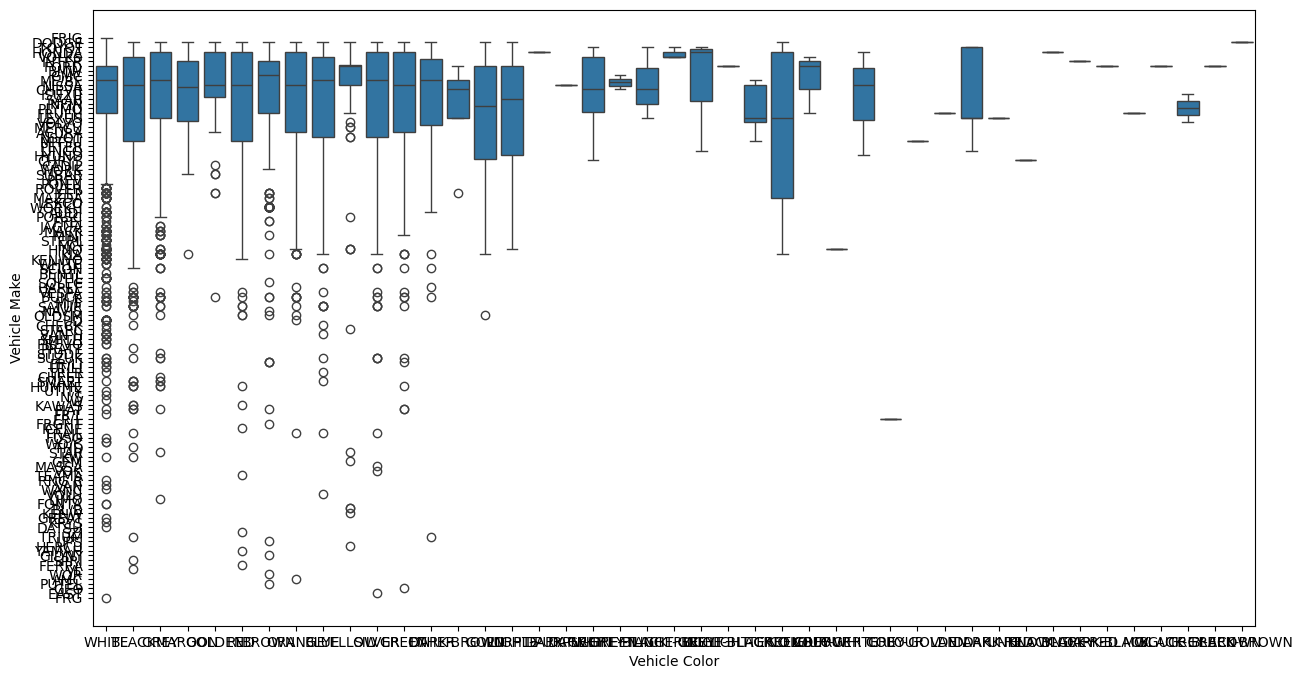

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gráfico pero algo apiñado
sns.boxplot(data=df8,x="Vehicle Color", y="Vehicle Make", hue=None)


<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

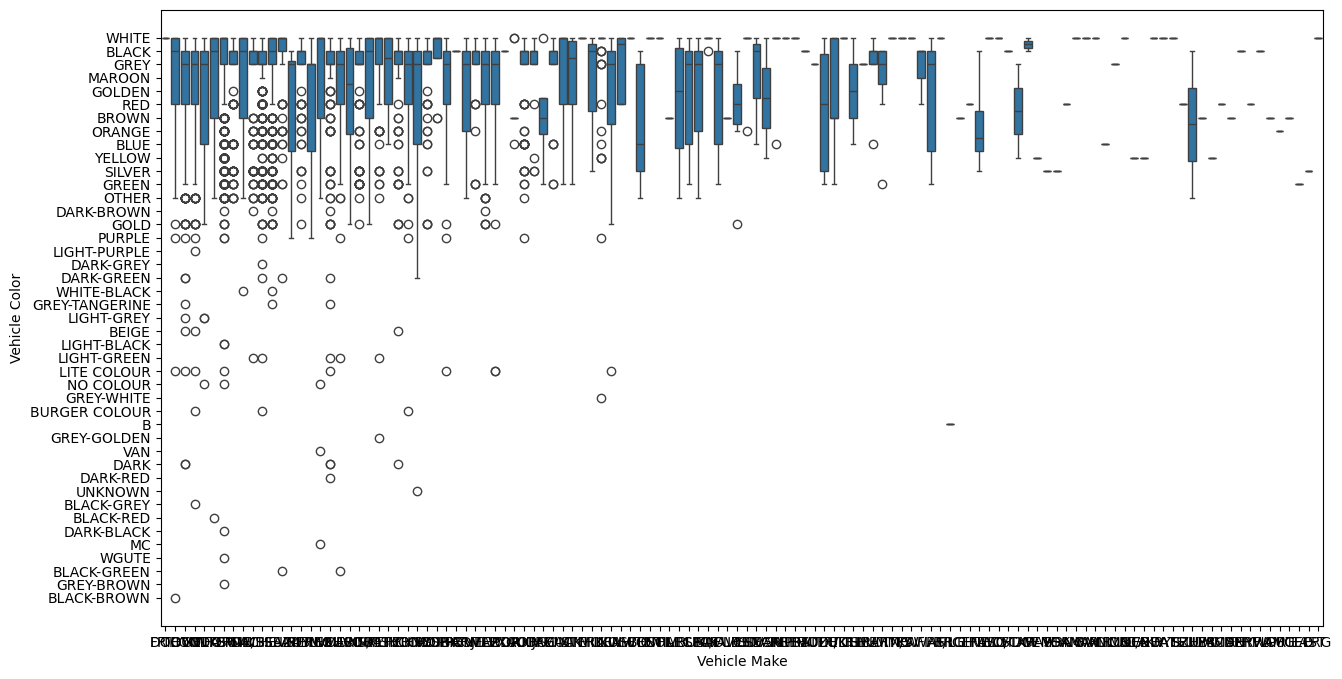

In [29]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=df8,x="Vehicle Make", y="Vehicle Color", hue=None)

In [116]:

df.columns

# # df["Vehicle Body Type"]
# pd.set_option("display.max_rows", None) 
# print(df["Vehicle Make"]).count

# print(df6["Vehicle Color"].value_counts())
# print(df6["Vehicle Make"].value_counts())
# print(df6.groupby["Vehicle Make"])

# (df6[["Vehicle Color","Vehicle Make"]].value_counts().dropna()).shape
# df66=df6[["Vehicle Color","Vehicle Make"]].dropna().shape

df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts()


# df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts().shape
# zas=(df6[["Vehicle Color","Vehicle Make"]].value_counts().dropna()) # Es una serie

# # pd.DataFrame(zas)

# zas=pd.DataFrame((df6[["Vehicle Color","Vehicle Make"]].value_counts())) # De Serie la transformo a DataFrame


zas2=pd.DataFrame(df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts())

df6[["Vehicle Color","Vehicle Make"]].dropna().value_counts()


Vehicle Color   Vehicle Make
WHITE           FORD            716
                CHEVR           392
GREY            HONDA           281
                TOYOT           267
BLACK           HONDA           233
GREY            NISSA           229
BLACK           TOYOT           228
                NISSA           218
                FORD            203
WHITE           FRUEH           187
BLACK           CHEVR           156
WHITE           GMC             154
                INTER           151
BLACK           ME/BE           148
GREY            FORD            144
WHITE           NISSA           124
BLACK           BMW             122
WHITE           TOYOT           118
GREY            CHEVR            96
BLACK           DODGE            94
WHITE           DODGE            93
BLACK           LINCO            87
WHITE           ISUZU            85
BLACK           JEEP             85
BROWN           INTER            84
WHITE           HONDA            80
BROWN           GMC              80

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

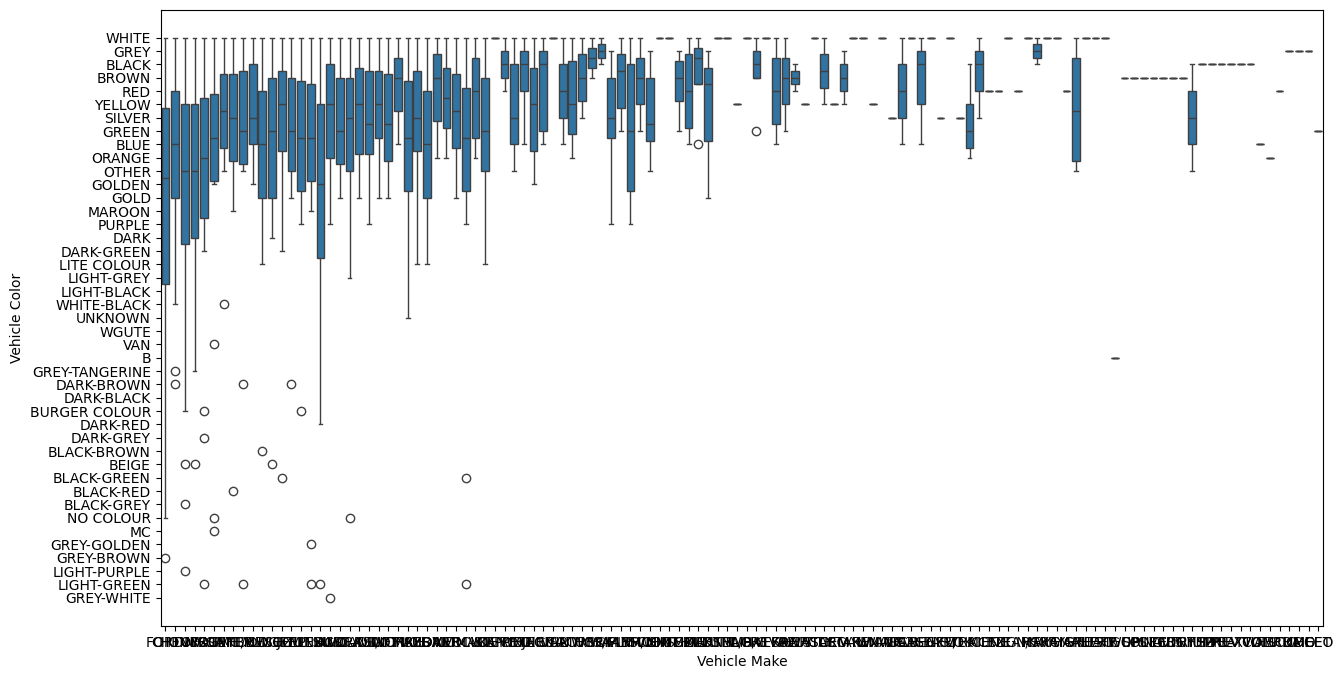

In [79]:
fig, ax = plt.subplots(figsize=(15, 8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=zas,x="Vehicle Make", y="Vehicle Color", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

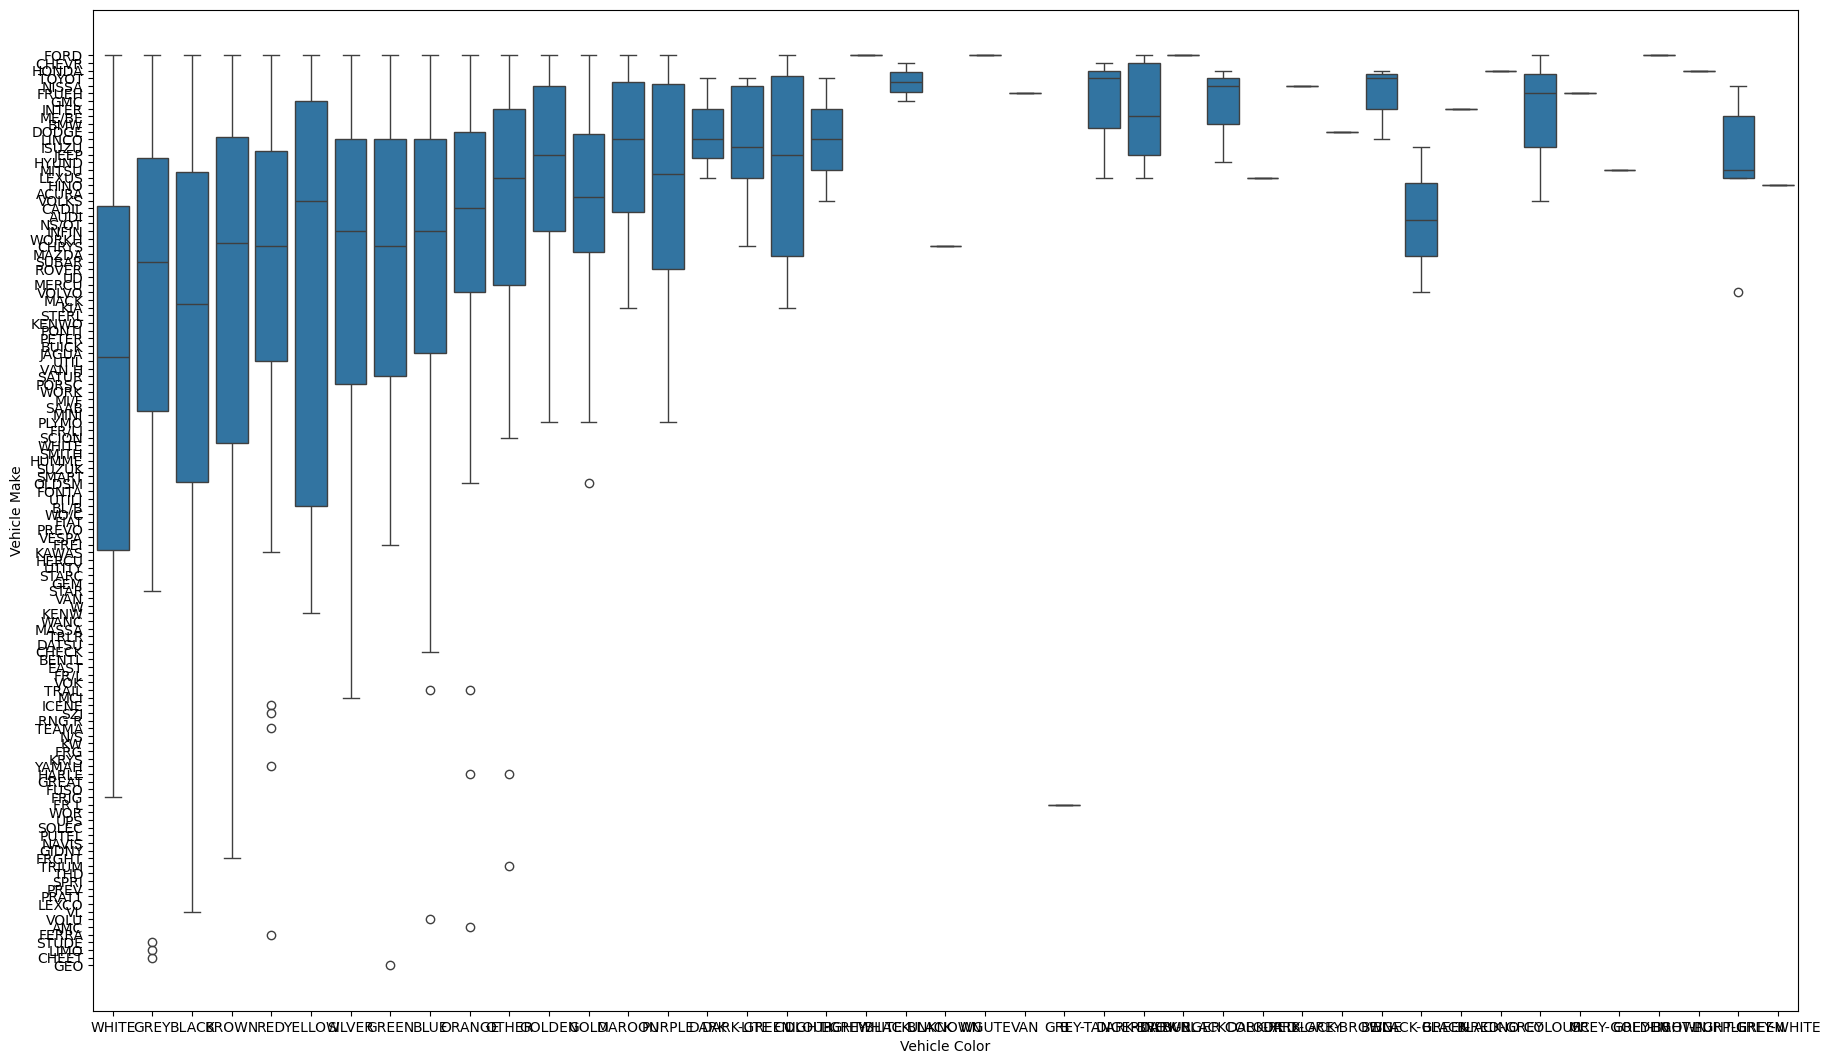

In [149]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.boxplot(data=zas2,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

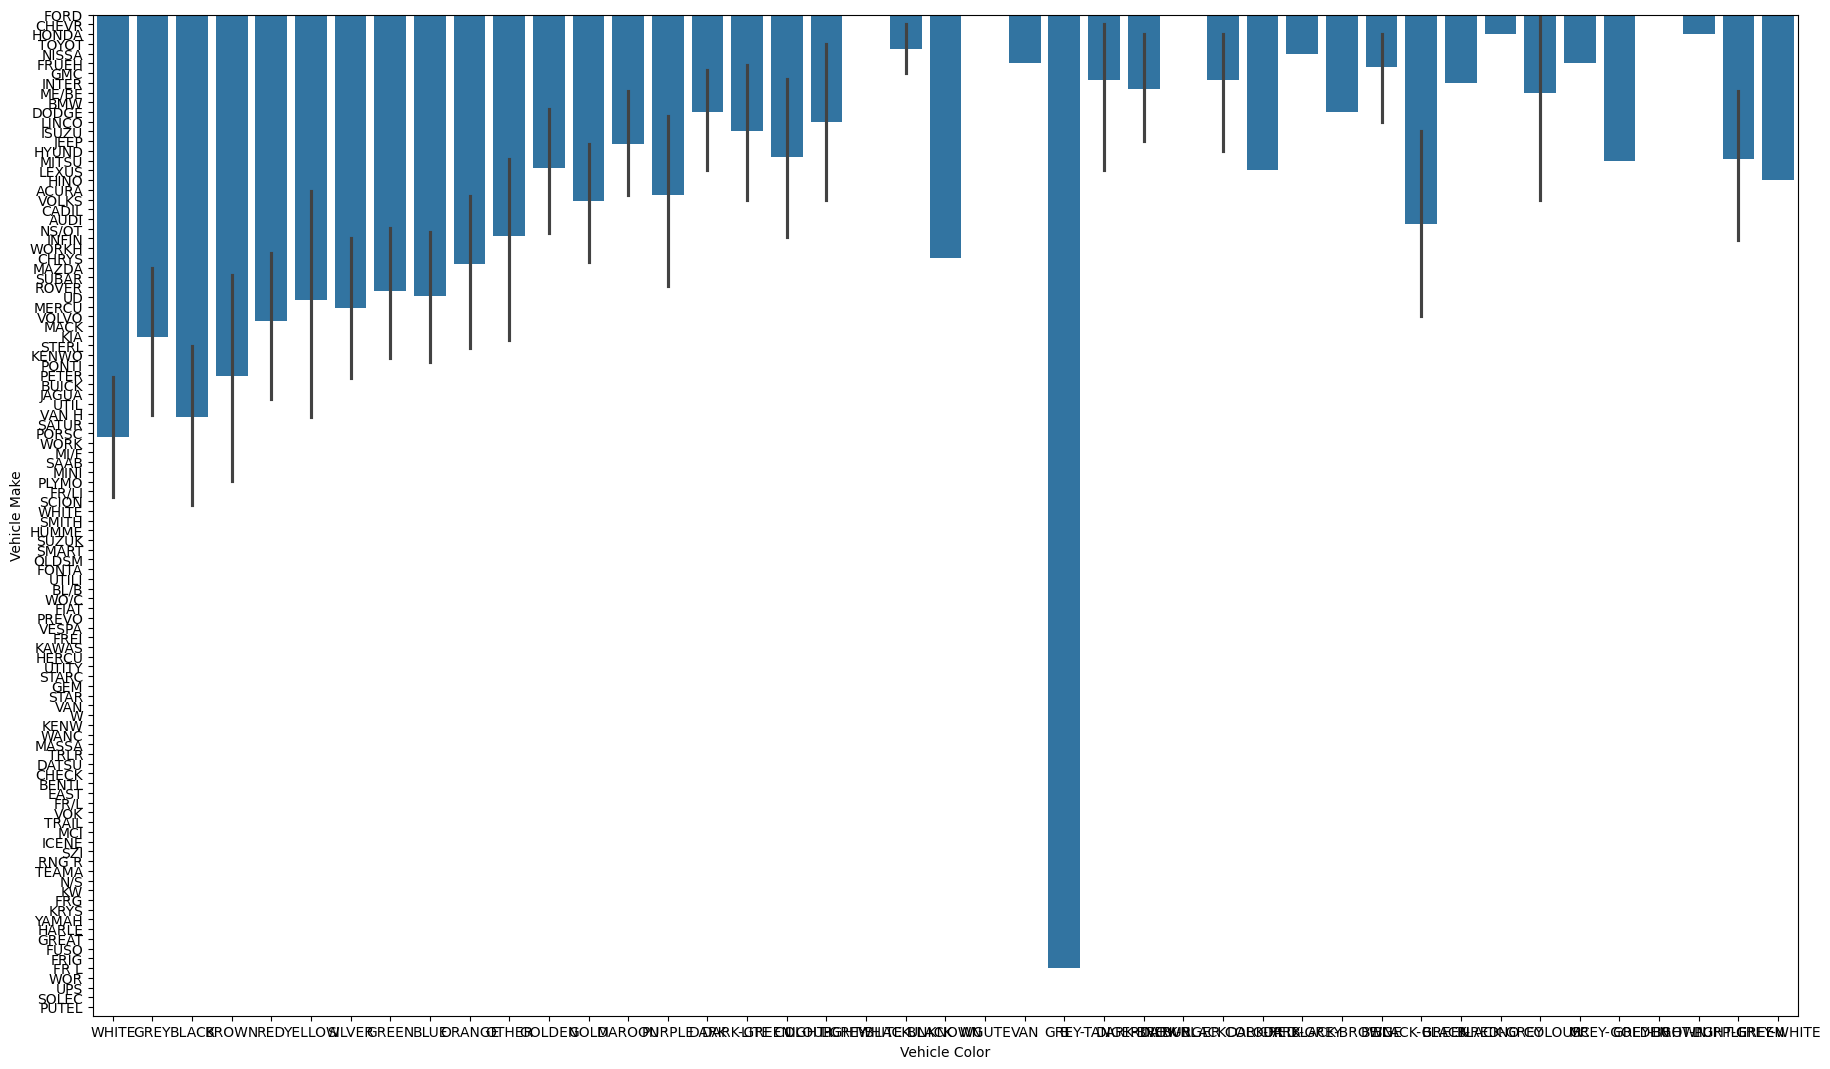

In [150]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas2,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

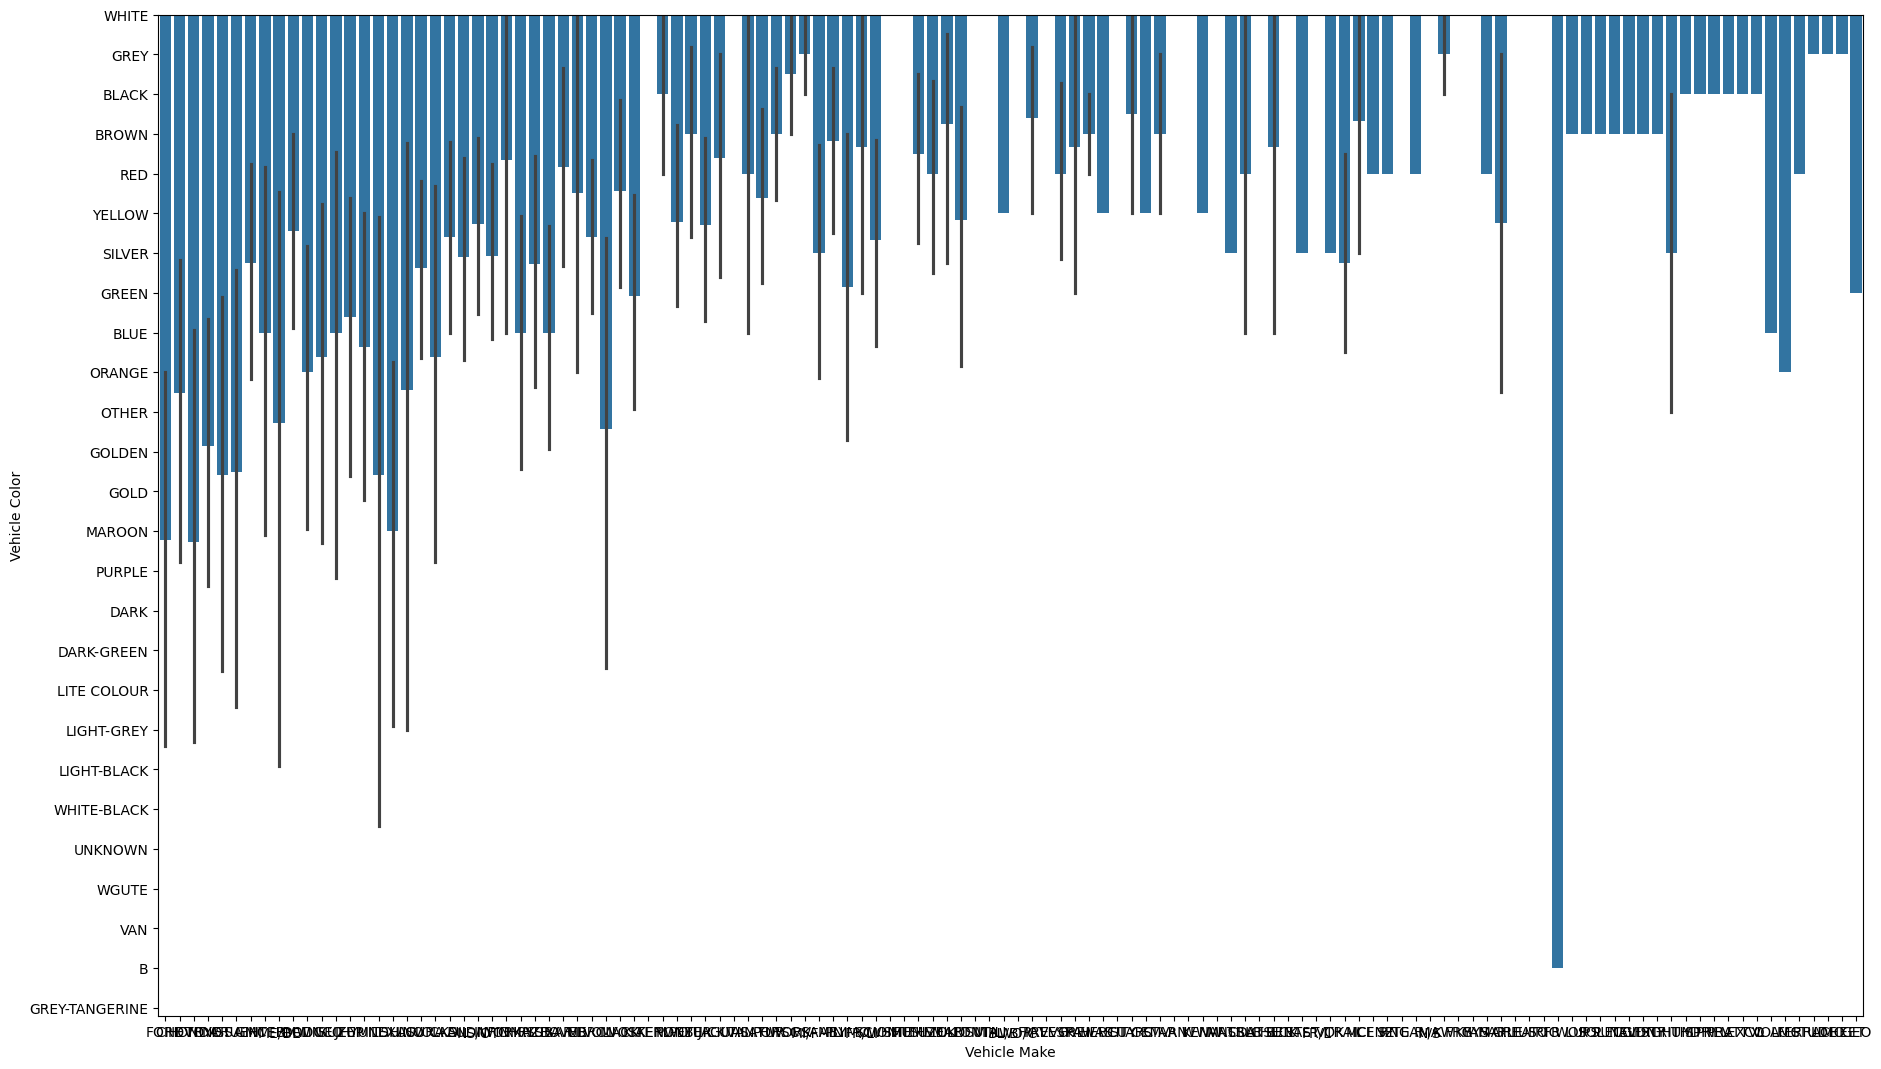

In [151]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas2,x="Vehicle Make", y="Vehicle Color", hue=None)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

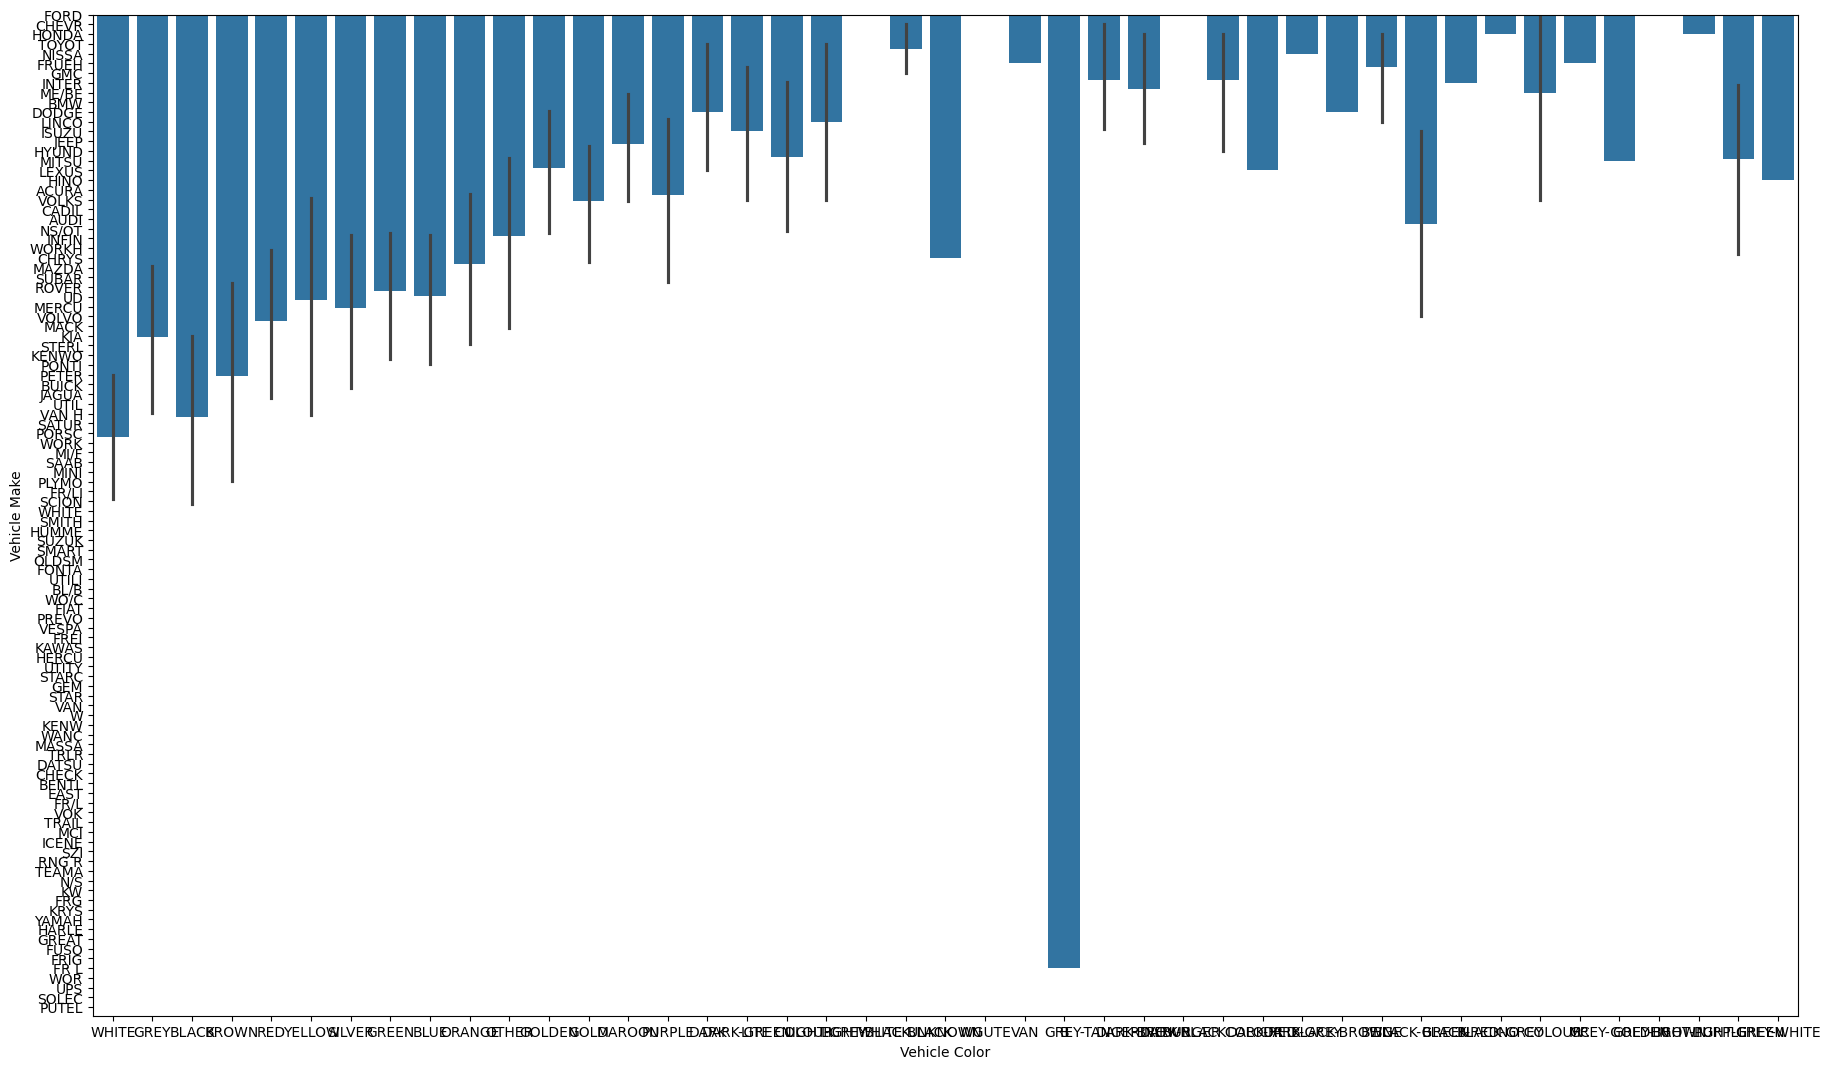

In [152]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas,x="Vehicle Color", y="Vehicle Make", hue=None)

<Axes: xlabel='Vehicle Make', ylabel='Vehicle Color'>

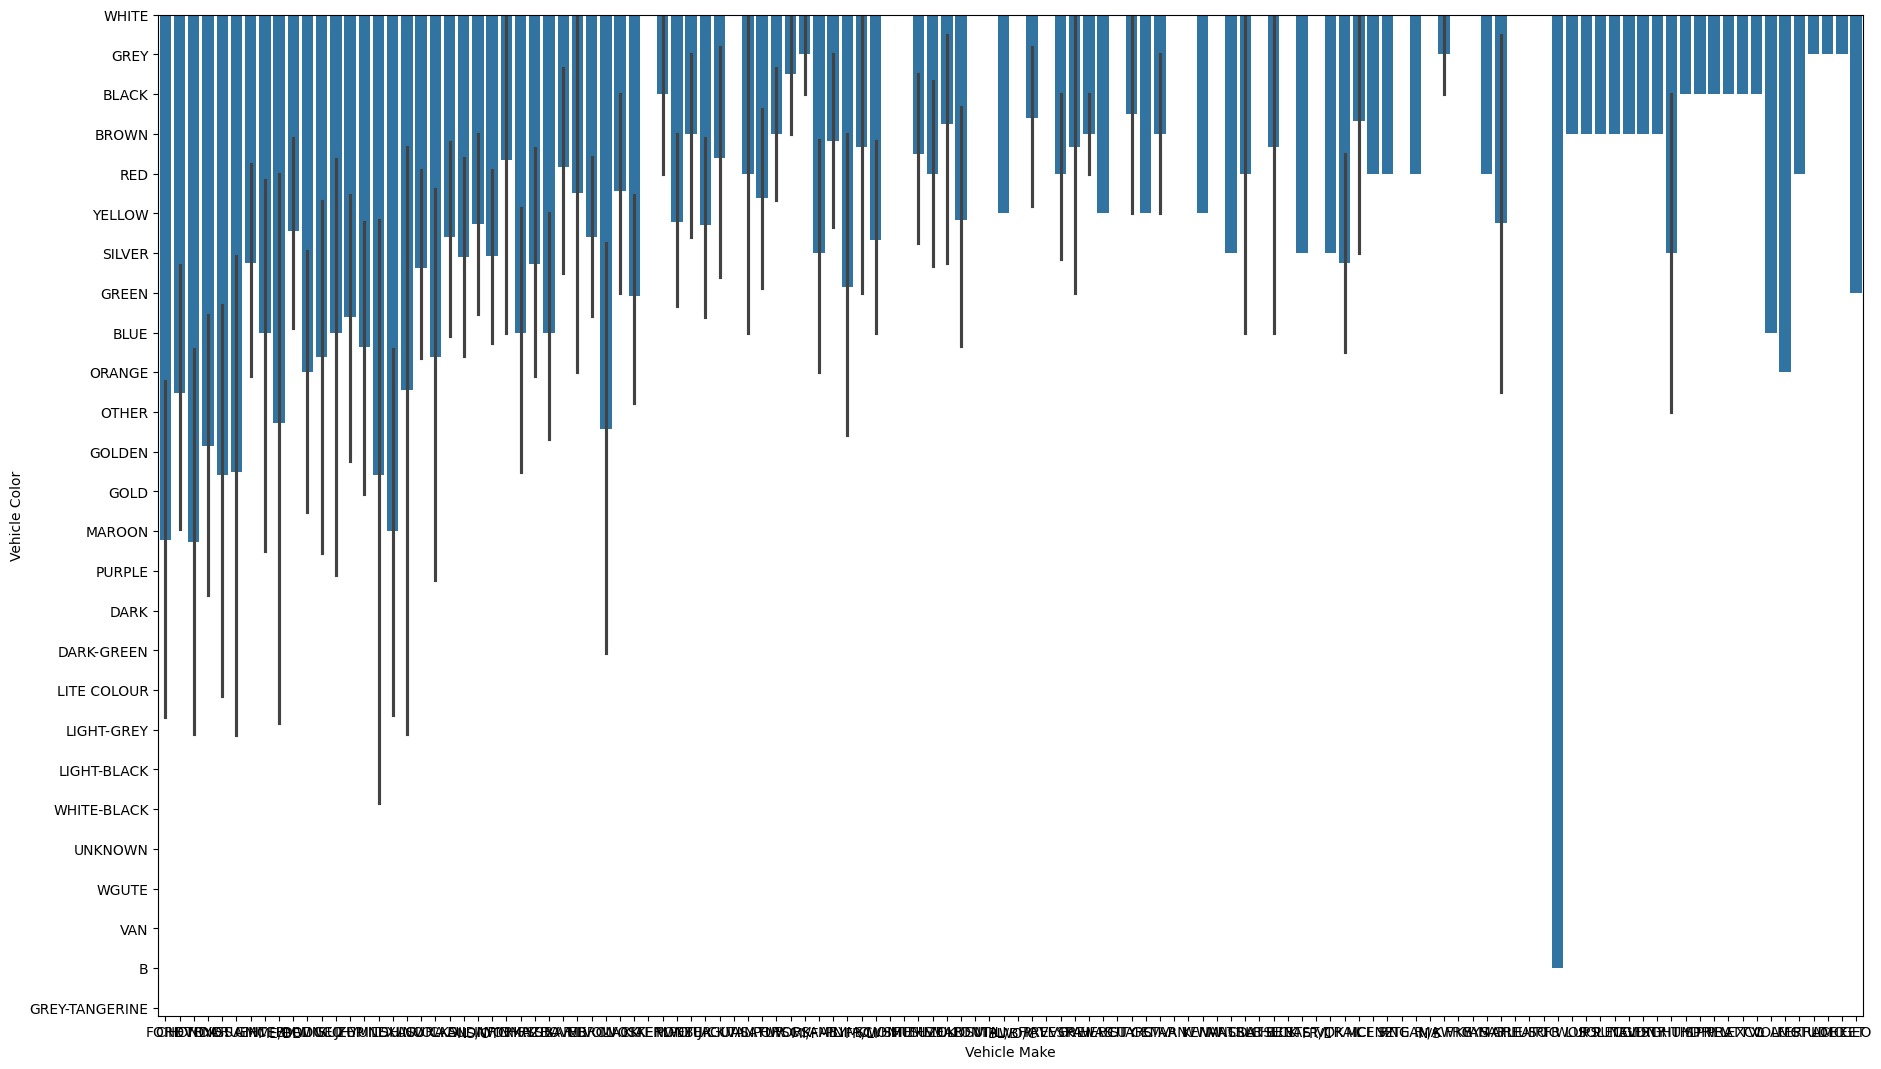

In [153]:
fig, ax = plt.subplots(figsize=(22,13)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado
sns.barplot(data=zas,x="Vehicle Make", y="Vehicle Color", hue=None)

c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='Vehicle Color', ylabel='Count'>

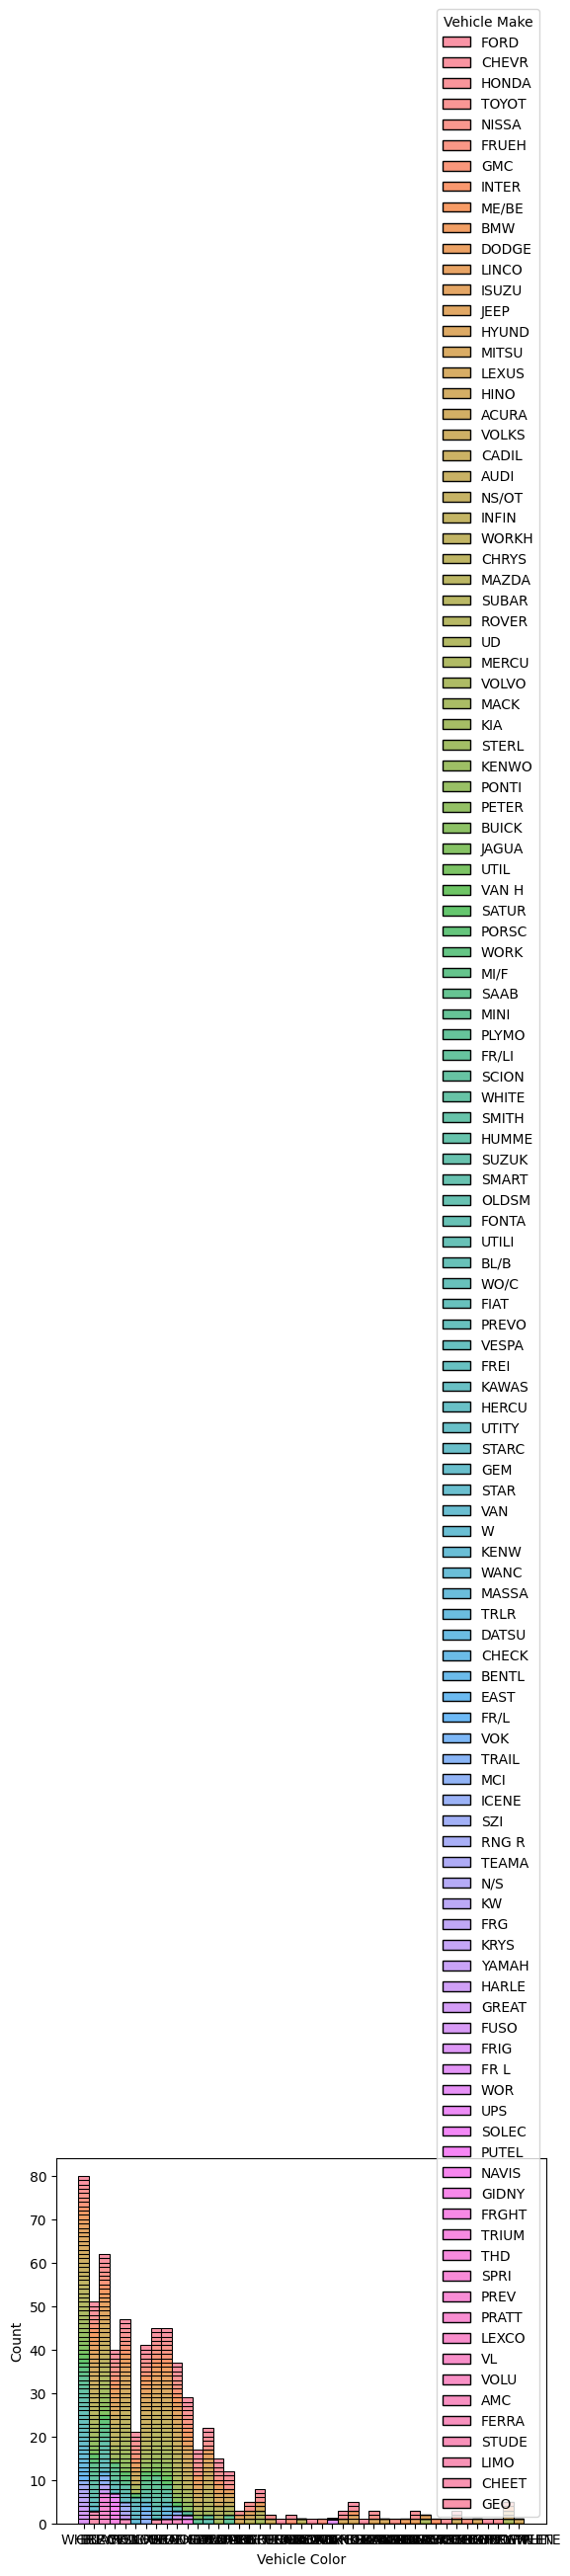

In [159]:
# sns.countplot(zas2, x="Vehicle Color", hue="Vehicle Make")
# sns.histplot(data=penguins, y="flipper_length_mm")

sns.histplot(data=zas2, x="Vehicle Color", hue="Vehicle Make", multiple="stack")


<Axes: xlabel='Vehicle Color', ylabel='Count'>

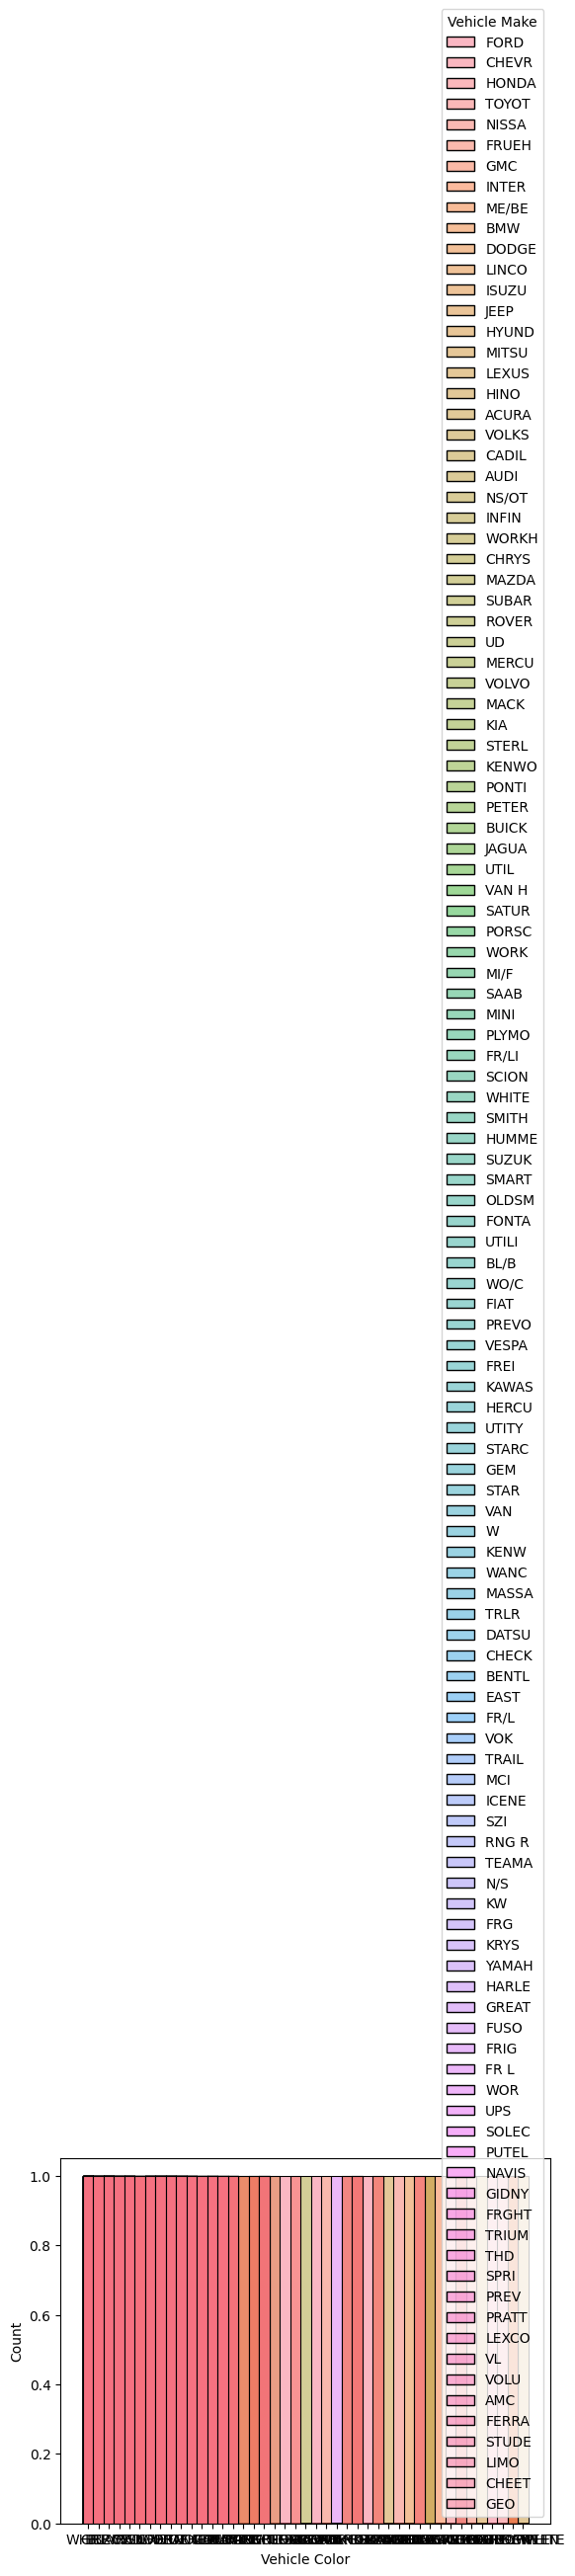

In [165]:
sns.histplot(data=zas2, x="Vehicle Color", hue="Vehicle Make")


<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

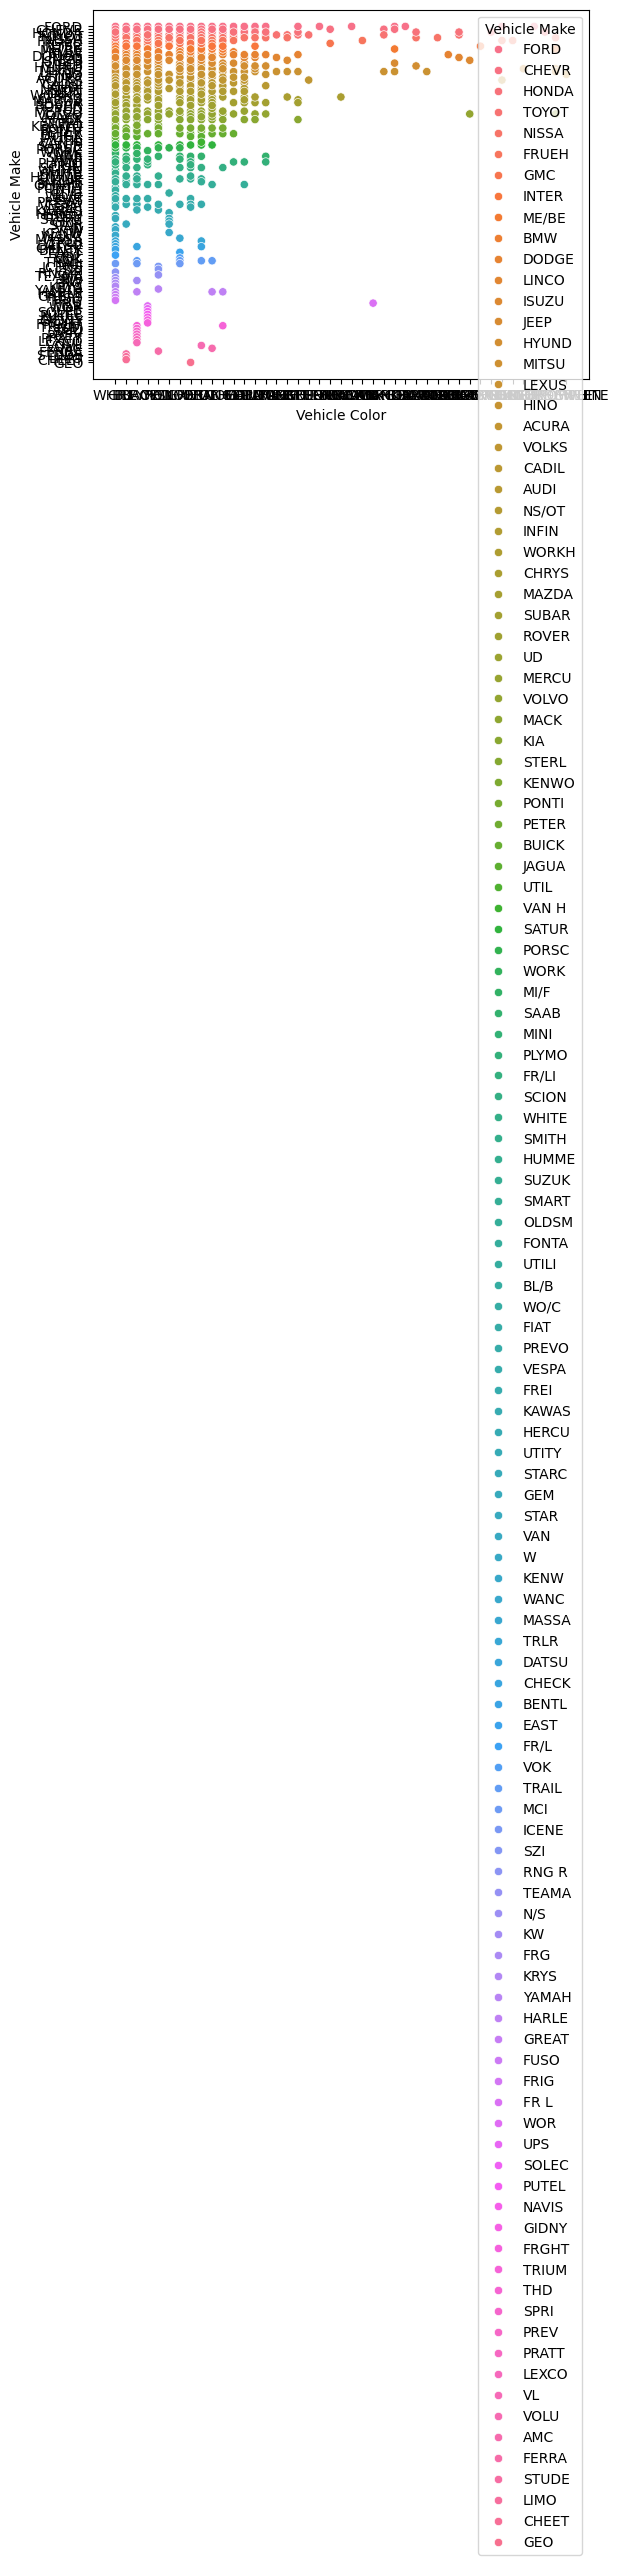

In [ ]:
# sns.kdeplot(data=zas2, x="Vehicle Color", hue="Vehicle Make",multiple="fill")

sns.scatterplot(data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make")

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

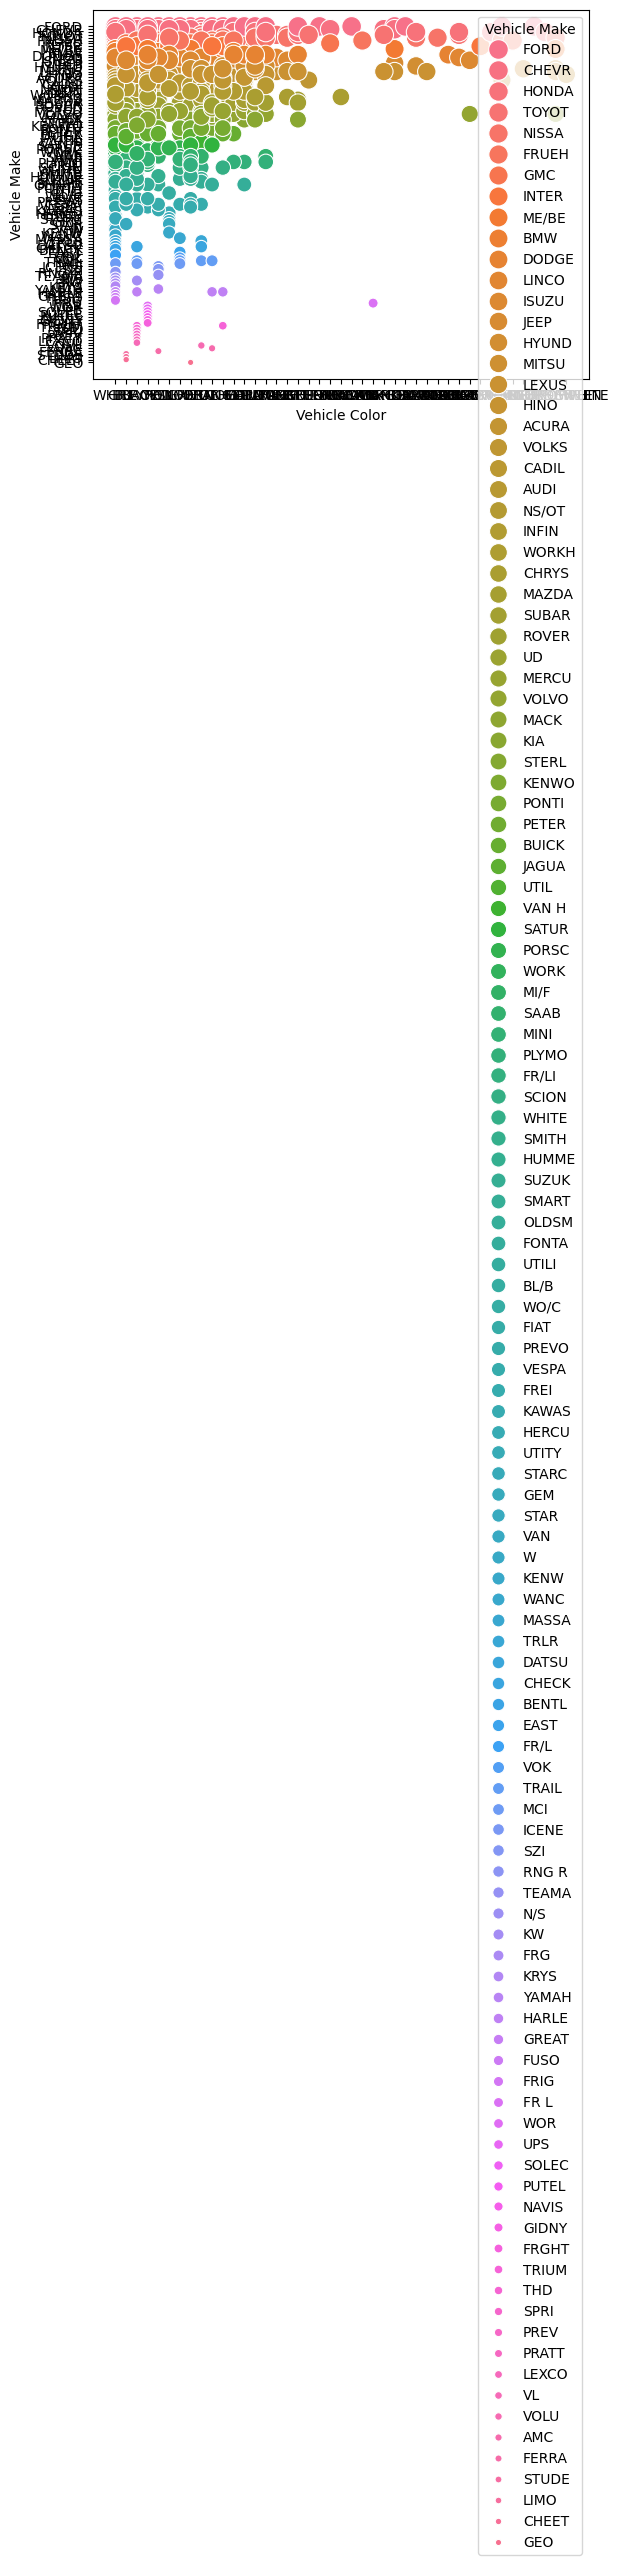

In [175]:
sns.scatterplot(
    data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make", size="Vehicle Make",
    sizes=(20, 200), legend="full"
)


# sns.scatterplot(data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Make")


<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

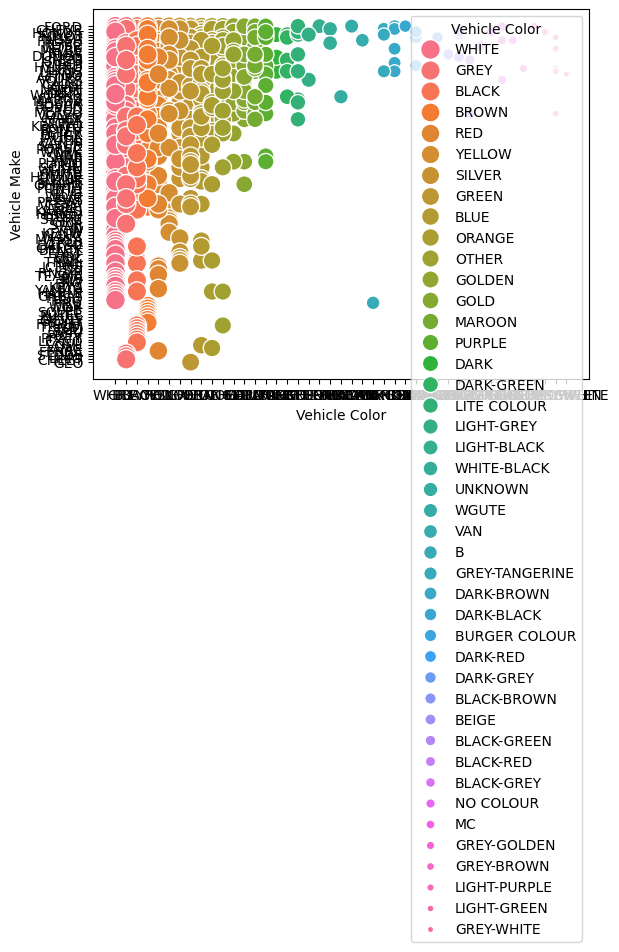

In [182]:
sns.scatterplot(
    data=zas2, x="Vehicle Color", y="Vehicle Make", hue="Vehicle Color", size="Vehicle Color",
    sizes=(20, 200), legend="full"
)

<Axes: xlabel='Vehicle Color', ylabel='Vehicle Make'>

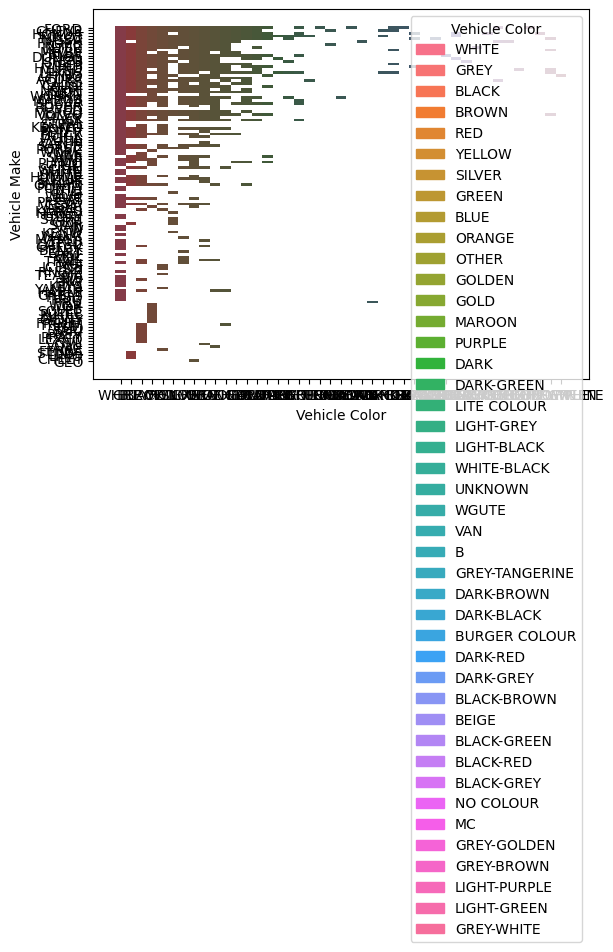

In [187]:
sns.histplot(data=zas2, x="Vehicle Color", y="Vehicle Make",hue="Vehicle Color")

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [211]:
df9=df

# df[["Issue Date","Violation Code"]]
# df.index = DatetimeIndex(df["date"])

df9.index = DatetimeIndex(df["Issue Date"])

df9.sort_index(inplace=True) # para ordenar los datos, Dice que sin esto no funciona,
#  yo lo he hecho sin usar esto pero caundo quieres añadir df.loc["2014":"2019"] no te deja porque los datos tienen que estar ordenados

df9 = df9.drop(columns="Issue Date") # Solo funciona 1 vez, luego hay que resetar el df

df9.shape

# df9.head(50)
# df9[["Issue Date","Violation Code"]] # al quitarle la dropna Issue Date, ya no existe como columna y solo existe Issue Data como fila
df9[["Violation Code"]].head(5)


,Violation Code
Issue Date,
2000-12-24,14
2012-03-03,20
2012-10-11,46
2012-10-30,19
2013-01-02,14


In [232]:
# (df9[["Violation Code"]].resample('M').nunique()) # Asi le quito el 0 a todas las filas
(df9[["Violation Code"]].resample('M').agg("count")) # Asi le quito el 0 a todas las filas

(df9[["Violation Code"]].resample('M').value_counts()) # Asi le quito el 0 a todas las filas

AttributeError: 'DatetimeIndexResampler' object has no attribute 'value_counts'

In [233]:
(df9[["Violation Code"]].resample('M').count()) # Asi le quito el 0 a todas las filas
# (df9[["Violation Code"]].resample('M').nunique()) # Asi le quito el 0 a todas las filas

,Violation Code
Issue Date,
2000-12-31,1
2001-01-31,0
2001-02-28,0
2001-03-31,0
2001-04-30,0
2001-05-31,0
2001-06-30,0
2001-07-31,0
2001-08-31,0


### J) Visualiza la anterior cuestión (I)

<Axes: xlabel='Violation Code', ylabel='Count'>

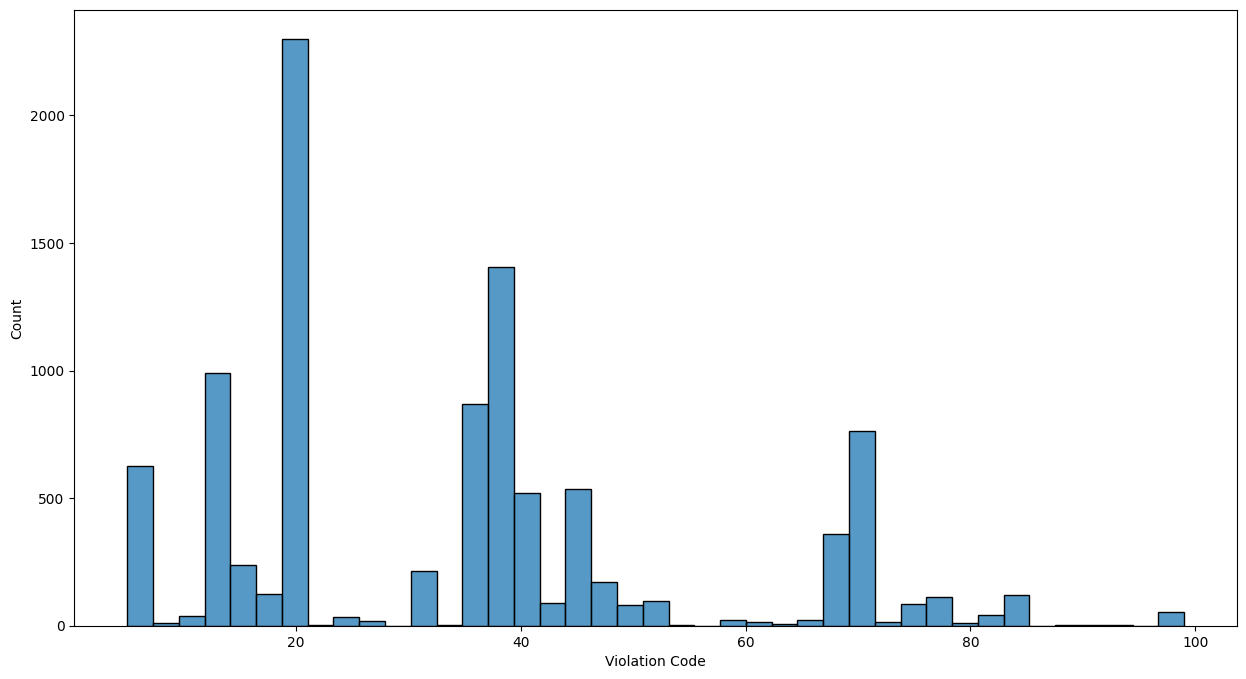

In [240]:
# (df9[["Violation Code"]].resample('M').count()) # Asi le quito el 0 a todas las filas

fig, ax = plt.subplots(figsize=(15,8)) # Establim el marc de dibuix-> Sin esto dibuja el gra´fico pero algo apiñado


sns.histplot(data=df9, x="Violation Code")


### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'